# Descripción del Proyecto

Análisis de los datos de campañas de marketing de una empresa Fintech para conseguir identificar patrones, tendencias y factores que influyen en que un cliente acabe contratando un depósito. Tras un análisis exhaustivo de todos sus datos, habrá que implementar un modelo simple que ayude a entender y predecir la efectividad de las campañas de marketing, y diseñar un dashboard para la capa ejecutiva de la fintech con los principales insights y KPIs de los resultados de las campañas.

# CONTEXTO SOBRE LOS DATOS
Las campañas de marketing se basan en llamadas telefónicas que tuvieron lugar de Mayo 2018 a Noviembre 2020. Los registros vienen ordenados por fecha, pero no hay una variable disponible con la fecha completa en el dataset original. Es importante también tener en cuenta que es posible que en algunos casos se requiera de más de un contacto con el mismo cliente para determinar si el depósito acaba siendo contratado no ('sí') o no ('no').

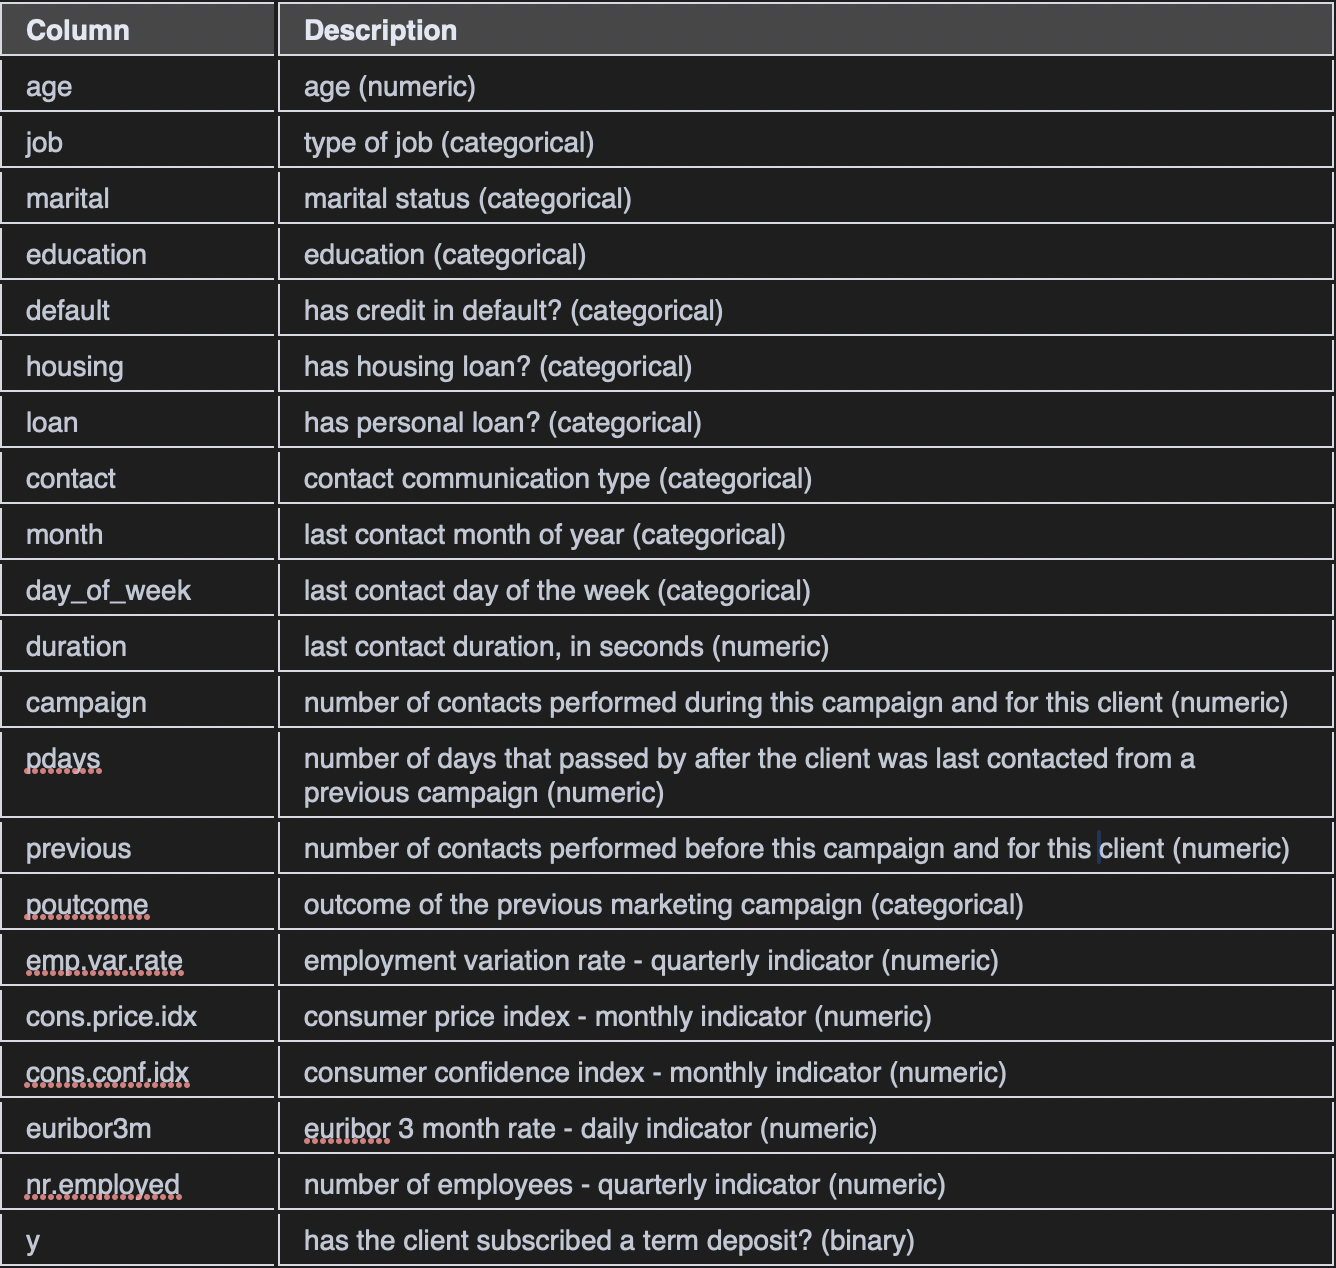

# Tareas

**Análisis de Datos:**

*   Entendimiento de datos de clientes, de los detalles de las campañas y sus resultados
*   Estadísticas descriptivas para entender las características básicas de los datos.
*   Análisis de la relación entre características demográficas del cliente (edad, trabajo, educación) y la suscripción a un depósito a plazo.
*   Evaluación del impacto de los detalles de la campaña (número de contactos, mes, día de la semana) en el resultado de la campaña.

# Preguntas:

1. De todos los clientes, ¿cuántos tienen la columna Loan (Sí) por campaña? [X]
2. De todos ellos, ¿cuántos han respondido afirmativamente a la campaña? [X]
3. ¿Cómo se relaciona el resultado de la campaña de marketing anterior con el Loan (Sí) frente al (No)?
4. ¿Cuántos son los clientes que han tenido éxito en la campaña anterior?
5. ¿Cuántos de ellos tienen más probabilidades de tener (Sí) o (No) con la siguiente campaña?
6. ¿Cómo se relaciona la edad con la columna Loan y la tasa de suscripción? [X]
7. ¿Cómo se relaciona el trabajo con la columna Loan? [X]
8. ¿Cómo se relaciona el estado material con la columna Loan? [X]
9. ¿Cómo se relaciona la educación con la columna Loan? [X]
10. ¿Cómo se relaciona el préstamo de vivienda con la columna Loan? [X]
11. Qué mes tiene más Loan (Sí) vs (No)? [X]
12. ¿Qué día de la semana tiene más Loan (Sí) frente a (No)? [X]
13. ¿Qué campaña tiene más (Sí) frente a (No)? [X]
14. ¿Cómo se relaciona la columna Duration con Loan (Sí) vs (No)? [X]
15. ¿Cómo se relaciona el rendimiento de la columna Número de contactos durante esta campaña con Loan (Sí) vs (No)? [X]
16. ¿Cuál es la relación entre el rendimiento de la columna Número de Contactos antes de esta campaña y Loan (Sí) vs (No)? [X]
17. ¿Cómo influye la duración desde el último contacto (pdays) en la contratación del depósito (Loan Sí vs No)?
18. ¿Cuál es la relación entre la tasa de variación del empleo (emp.var.rate) y la respuesta del cliente (Loan Sí vs No)?

# Codigo

# Proyecto de Análisis de Marketing para una Fintech

In [ ]:
# Agregar libreries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

In [ ]:
# Dataset
df_data = pd.read_csv('/content/drive/MyDrive/Proyecto Final Datos/bank-additional_bank-additional-full.csv', sep=';')
df_data

In [ ]:
def exploracion_inicial(df, tipo = None):
    if tipo == 'version_lite':
        print("¿Cuántas filas y columnas hay en el conjunto de datos?")
        num_filas, num_columnas = df.shape
        print("\tHay {:,} filas y {:,} columnas.".format(num_filas, num_columnas))
    else:
        print("¿Cuántas filas y columnas hay en el conjunto de datos?")
        num_filas, num_columnas = df.shape
        print("\tHay {:,} filas y {:,} columnas.".format(num_filas, num_columnas))
        print('\n########################################################################################')

print("¿Cuáles son las primeras dos filas del conjunto de datos?")
display(df_data.head(2))
print('\n########################################################################################')

print("¿Cuáles son las primeras cinco filas del conjunto de datos?")
display(df_data.head())
print('\n########################################################################################')

print("¿Cuáles son las últimas cinco filas del conjunto de datos?")
display(df_data.tail())
print('\n########################################################################################')

print("¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?")
display(df_data.sample(n = 5))
print('\n########################################################################################')

print("¿Cuáles son las columnas del conjunto de datos?")
for i in list(df_data.columns):
    print('\t - ' + i)
print('\n########################################################################################')

print("¿Cuál es el tipo de datos de cada columna?")
print(df_data.dtypes)
print('\n########################################################################################')

print("¿Cuántas columnas hay de cada tipo de datos?")
print(df_data.dtypes.value_counts())
print('\n########################################################################################')

print("¿Cómo podríamos obtener información más completa sobre la estructura y el contenido del DataFrame?")
print(df_data.info())
print('\n########################################################################################')

print("¿Cuántos valores únicos tiene cada columna?")
print(df_data.nunique())
print('\n########################################################################################')

print("¿Cuáles son las estadísticas descriptivas básicas de todas las columnas?")
display(df_data.describe(include = 'all').fillna(''))
print('\n########################################################################################')

print("¿Hay valores nulos en el conjunto de datos?")
print(df_data.isnull().sum().sort_values(ascending = False))
print('\n########################################################################################')

print("¿Cuál es el porcentaje de valores nulos en cada columna?")
print(round((df_data.isnull().sum()/len(df_data)*100), 2).sort_values(ascending = False))
print('\n########################################################################################')

print("¿Hay valores duplicados en el conjunto de datos?")
print(df_data.duplicated().sum())
print('\n########################################################################################')

print("¿Cuál es el porcentaje de valores nulos en cada columna?")
print(round((df_data.duplicated().sum()/len(df_data)*100), 2))
print('\n########################################################################################')
print('¿Cómo se llaman los valores únicos de las columnas categoricas?')
jobs = df_data['job'].unique().tolist()
print('Los valores únicos de la columna jobs son: ', jobs)
marital = df_data['marital'].unique().tolist()
print('Los valores únicos de la columna martital son: ', marital)
education = df_data['education'].unique().tolist()
print('Los valores únicos de la columna education son: ', education)
default = df_data['default'].unique().tolist()
print('Los valores únicos de la columna default son: ', default)
housing = df_data['housing'].unique().tolist()
print('Los valores únicos de la columna housting son: ', housing)
loan = df_data['loan'].unique().tolist()
print('Los valores únicos de la columna loan son: ', loan)
contact = df_data['contact'].unique().tolist()
print('Los valores únicos de la columna contact son: ', contact)
month = df_data['month'].unique().tolist()
print('Los valores únicos de la columna month son: ', month)
day_of_week = df_data['day_of_week'].unique().tolist()
print('Los valores únicos de la columna day_of_week son: ', day_of_week)
y = df_data['y'].unique().tolist()
print('Los valores únicos de la columna y son: ', y)
print('\n########################################################################################')
print('¿Cuantas campañas tenemos?')
campaign= df_data['campaign'].unique().tolist()
print('Los valores únicos de la columna campaign son: ', campaign)
print('\n########################################################################################')
print('¿Cuantos son los valores que poseé cada campaña?')
print(df_data['campaign'].value_counts().sort_index())

print('\n########################################################################################')

In [ ]:

# Definir el tamaño mínimo de la muestra por campaña
min_sample_size = df_data['campaign'].value_counts().quantile(0.25)

# Filtrar campañas con una muestra significativa
significant_campaigns = df_data['campaign'].value_counts()[df_data['campaign'].value_counts() >= min_sample_size].sort_index(ascending=True)

print(f"Número de campañas con muestra significativa: {len(significant_campaigns)}")


In [ ]:
significant_campaigns

In [ ]:

df_data = df_data[df_data['campaign'].isin(significant_campaigns.index)]




In [ ]:
# Funcion Create Staked Bar Plot
def create_stacked_bar_plot(data, title, xlabel=None, ylabel=None):

  data.plot(kind='bar', stacked=True)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

# 1. De todos los clientes, ¿cuántos tienen la columna Loan (Sí) por campaña?

In [ ]:
# De todos los clientes, ¿cuántos tienen la columna Loan (Sí) por campaña?
clients_with_personal_loan = df_data[df_data['loan'] == 'yes'].groupby('campaign').size()
clients_with_personal_loan.head(10)

In [ ]:
# Añadir columna 'clients_with_personal_loan'
df_data['clients_with_personal_loan'] = clients_with_personal_loan
#df_data.fillna(0, inplace=True)
df_data.head(10)

In [ ]:
clients_with_personal_loan.head(10).plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Number of Clients with Personal Loan by Campaign (Top 10)')
plt.xlabel('Campaign')
plt.ylabel('Number of Clients with Loan')
plt.xticks(rotation=360)
plt.show()

# 2. De todos ellos, ¿cuántos han respondido afirmativamente a la campaña?

In [ ]:
# Count the occurrences of 'yes' and 'no' in the 'y' column
response_counts = df_data['y'].value_counts()
response_counts


In [ ]:
#De todos ellos, ¿cuántos han respondido afirmativamente a la campaña?
clients_with_loan_and_yes = df_data[(df_data['loan'] == 'yes') & (df_data['y'] == 'yes')]
clients_with_loan_and_yes

clients_with_loan_and_yes_count = clients_with_loan_and_yes.groupby('campaign').size()
clients_with_loan_and_yes_count

In [ ]:
clients_with_loan_and_yes_count.plot(kind='bar', figsize=(12, 6), color='green')
plt.title('Clients with Personal Loan who said "Yes" to Campaign by Campaign')
plt.xlabel('Campaign')
plt.ylabel('Number of Clients with Loan & Campaign Response = Yes')
plt.xticks(rotation=360)
plt.show()

# 3. ¿Cómo se relaciona el resultado de la campaña de marketing anterior con el Loan (Sí) frente al (No)? # Si el cliente tiene prestamos si o no?


In [ ]:
df_data['poutcome'].unique()

In [ ]:
#número de cada uno de los valores de la columna poutcome
poutcome_counts = df_data['poutcome'].value_counts()
poutcome_counts


In [ ]:


# Group the data by previous campaign outcome and loan status
previous_campaign_impact = df_data.groupby(['poutcome', 'loan'])['y'].value_counts(normalize=True).unstack()

# Display the results
print(previous_campaign_impact)

# Create a stacked bar plot to visualize the relationship
previous_campaign_impact.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Relationship between Previous Campaign Outcome, Loan Status, and Current Campaign Success')
plt.xlabel('Previous Campaign Outcome and Loan Status')
plt.ylabel('Proportion of Customers')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Current Campaign Outcome')
plt.tight_layout()
plt.show()


# 4. ¿Cuántos son los clientes que han tenido éxito en la campaña anterior?

In [ ]:
# Calculate success of each campaign
campaign_success = df_data.groupby('campaign')['y'].value_counts().unstack()
#campaign_success = campaign_success.fillna('-')
campaign_success.dropna()

In [ ]:
# Calculate success of each campaign
campaign_success_rate = df_data.groupby('campaign')['y'].value_counts(normalize=True).unstack() * 100

#campaign_success = campaign_success.fillna('-')
campaign_success_rate.dropna()

In [ ]:
campaign_success_rate['yes'].plot(kind='line', figsize=(10, 6), marker='o', color='green')
plt.title('Success Rates by Campaign')
plt.ylabel('Percentage (%)')
plt.xlabel('Campaign')
plt.grid()
plt.show()

In [ ]:
# Identify the most successful campaign overall
most_successful_campaign = campaign_success['yes'].idxmax()
most_successful_campaign

# 5. ¿Cuántos de ellos tienen más probabilidades de tener (Sí) o (No) con la siguiente campaña? (A/B TESTING)

## Hipótesis 1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats




In [ ]:
# Creamos columna y_numeric, para poder manipular la columna y con datos e interpretar su información.
df_data['y_numeric'] = df_data['y'].map({'yes': 1, 'no': 0})
# Calcular la tasa de conversión por grupo
conversion_rates = df_data.groupby('campaign')["y_numeric"].sum()
print(conversion_rates)




In [ ]:
# Visualizar la tasa de conversión
plt.figure(figsize=(10,5))
sns.barplot(x=conversion_rates.index, y=conversion_rates.values)
plt.title("Tasa de conversión según número de contactos")
plt.xlabel("Número de contactos (agrupado)")
plt.ylabel("Tasa de conversión (%)")
#plt.ylim(0, max(conversion_rates.values) + 2)
plt.show()

In [ ]:
# Prueba estadística (Mann-Whitney U Test)
campaign_yes = df_data[df_data["y_numeric"] == 1]["campaign"]
campaign_no = df_data[df_data["y_numeric"] == 0]["campaign"]
stat, p_value_mw = stats.mannwhitneyu(campaign_yes, campaign_no, alternative="two-sided")
print("\n📊 Resultado de la prueba Mann-Whitney U:")
print(f"Estadístico de prueba: {stat}")
print(f"Valor p: {p_value_mw}")

## Hipótesis 2

In [ ]:


# Comparar la duración de las llamadas entre clientes que contrataron y los que no
duration_stats = df_data.groupby("y_numeric")["duration"].describe()
print("\n📊 Estadísticas de Duración de Llamada:")
print(duration_stats)


In [ ]:
# Visualización de la distribución de duración de llamada
plt.figure(figsize=(10,5))
sns.boxplot(x=df_data["y"], y=df_data["duration"])
plt.yscale("log")  # Escala logarítmica por la alta dispersión
plt.title("Distribución de la duración de la llamada según respuesta del cliente")
plt.xlabel("Contrató el depósito (y)")
plt.ylabel("Duración de la llamada (segundos)")
plt.show()

In [ ]:
# Prueba de Mann-Whitney U
duration_yes = df_data[df_data["y_numeric"] == 1]["duration"]
duration_no = df_data[df_data["y_numeric"] == 0]["duration"]
stat, p_value_mw = stats.mannwhitneyu(duration_yes, duration_no, alternative="two-sided")

print("\n📊 Resultado de la prueba Mann-Whitney U:")
print(f"Estadístico de prueba: {stat}")
print(f"Valor p: {p_value_mw}")

## Hipótesis 3

In [ ]:
# Comparar tasas de conversión según el número de contactos previos
conversion_by_previous = df_data.groupby("previous")["y_numeric"].mean() * 100
print("\n📊 Tasa de Conversión por Contacto Previo:")
print(conversion_by_previous)

In [ ]:
# Visualización de tasas de conversión
plt.figure(figsize=(8,5))
sns.barplot(x=conversion_by_previous.index, y=conversion_by_previous.values)
plt.title("Tasa de conversión según si el cliente fue contactado previamente")
plt.xlabel("Número de veces contactado previamente")
plt.ylabel("Tasa de conversión (%)")
plt.show()

In [ ]:
# Prueba de Chi-Cuadrado
df_data["previous_contact"] = df_data["previous"].apply(lambda x: "No Contactado" if x == 0 else "Contactado Antes")
contingency_table = pd.crosstab(df_data["previous_contact"], df_data["y_numeric"])
chi2_stat, p_value_chi2, dof, expected = stats.chi2_contingency(contingency_table)
print(contingency_table)
print("\n📊 Resultado de la prueba Chi-Cuadrado:")
print(f"Estadístico de prueba: {chi2_stat}")
print(f"Valor p: {p_value_chi2}")

In [ ]:
# 1.- Impacto del contacto previo en la conversión por ocupación

# Comparar la tasa de conversión por tipo de trabajo y contacto previo
job_previous_conversion = df_data.groupby(["job", "previous_contact"])["y_numeric"].mean() * 100
print("\n📊 Tasa de Conversión por Trabajo y Contacto Previo:")
print(job_previous_conversion)

In [ ]:
# 2.- Conversión en autónomos, estudiantes y jubilados con contacto previo

# Filtrar solo autónomos, estudiantes y jubilados
selected_jobs = ["self-employed", "student", "retired"]
df_selected = df_data[df_data["job"].isin(selected_jobs)]

In [ ]:
# Comparar la tasa de conversión en estos grupos con y sin contacto previo
selected_job_conversion = df_selected.groupby(["job", "previous_contact"])["y_numeric"].mean() * 100
print("\n📊 Tasa de Conversión de Autónomos, Estudiantes y Jubilados por Contacto Previo:")
print(selected_job_conversion)


In [ ]:
# 3.- Duracion de la llamada

# Comparar la duración promedio de la llamada en clientes contactados previamente vs. no contactados
duration_previous_contact = df_data.groupby(["previous_contact", "y_numeric"])["duration"].describe()
print("\n📊 Duración de Llamada por Contacto Previo y Conversión:")
print(duration_previous_contact)

# 6. ¿Cómo se relaciona la edad con la columna Loan y la tasa de suscripción?

In [ ]:
df_data['age'].unique

In [ ]:
df_data.groupby(['y','loan'])['age'].describe()

## Formación de grupos de edades

In [ ]:
df_data['age'].describe()

In [ ]:
def calculate_age_range_limits(df, column_name, quantiles=[0,0.25, 0.5, 0.75,1]):
    age_quantiles = df[column_name].quantile(quantiles)
    age_range_limits = age_quantiles.to_dict()
    return age_range_limits


age_limits = calculate_age_range_limits(df_data, 'age')
age_limits


In [ ]:
IQR=np.quantile(df_data['age'],0.75)-np.quantile(df_data['age'],0.25)
IQR

In [ ]:
#Outliers
Low_treshold=np.quantile(df_data['age'],0.25)-1.5*IQR
High_treshold=np.quantile(df_data['age'],0.75)+1.5*IQR
print(Low_treshold)
print(High_treshold)


In [ ]:
# Age Bins/Groups
age_bins = [17, 32, 38, 47, 70, float('inf')]
age_labels = ['17-32', '33-38', '39-47', '48-69','70+']

df_data['age_group'] = pd.cut(df_data['age'], bins=age_bins, labels=age_labels, right=False)

df_data[['age', 'age_group']]

df_data

In [ ]:
#Relación entre la edad y la tasa de suscripción
age_relationship_subscription_y = df_data.groupby(['y', 'age_group']).size().unstack().fillna(0)
age_relationship_subscription_y

In [ ]:
# Calculate the percentage of each age group for each subscription outcome
age_relationship_subscription_y_pct = age_relationship_subscription_y.div(age_relationship_subscription_y.sum(axis=1), axis=0) * 100

# Create the plot
ax = age_relationship_subscription_y_pct.plot(kind='bar', figsize=(12, 6))
plt.title('Percentage of Subscription Outcome by Age Group')
plt.xlabel('Subscription Outcome')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()


In [ ]:


import matplotlib.pyplot as plt

# Calculate subscription rates by age group
subscription_rates = df_data.groupby('age_group')['y'].value_counts(normalize=True).unstack() * 100

# Create the plot
ax = subscription_rates.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Subscription Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Subscription Outcome')

# Add percentage labels on top of each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.tight_layout()
plt.show()


In [ ]:
age_relationship_subscription_y.plot(kind='bar', figsize=(10, 6))
plt.title('Subscription Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Subscription')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age')
plt.tight_layout()
plt.show()


In [ ]:
# Cómo se relaciona la edad y loan?
age_relationship_loan = df_data.groupby(['age_group','loan']).size().unstack()
age_relationship_loan.fillna(0)

In [ ]:
age_relationship_loan.plot(kind='bar', figsize=(10, 6))
plt.title('Loan Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Subscription ')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loan')
plt.tight_layout()
plt.show()


In [ ]:
age_relationship_subscription_loan = df_data.groupby(['age_group'])[['y','loan']].value_counts().unstack()
age_relationship_subscription_loan

In [ ]:

# Calculate the percentage of 'yes' and 'no' for each 'loan' category
loan_y_percentage = df_data.groupby('loan')['y'].value_counts(normalize=True).unstack() * 100

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(loan_y_percentage, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Percentage'})
plt.title('Relationship between Loan and Subscription (in percentages)')
plt.xlabel('Subscription (y)')
plt.ylabel('Loan')
plt.show()


# 7. ¿Cómo se relaciona el trabajo con la columna Loan?

In [ ]:

print(f"Número total de contactos: {len(df_data)}")


In [ ]:

# Group the data by job and loan status
job_loan_relationship = df_data.groupby(['job'])['y'].value_counts(normalize=True).unstack()

# Display the results
print(job_loan_relationship)

# Create a stacked bar plot to visualize the relationship
job_loan_relationship.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Relationship between Job, Loan Status, and Subscription')
plt.xlabel('Job')
plt.ylabel('Proportion of Customers')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Subscription')
plt.tight_layout()
plt.show()

# Calculate the percentage of contacts for each job
job_contact_percentage = df_data.groupby('job').size() / len(df_data) * 100

# Print the percentage of contacts for each job
print("\nPercentage of Contacts by Job:")
job_contact_percentage


In [ ]:
job_relationship_subscription = df_data.groupby(['job', 'y']).size().unstack()
job_relationship_subscription.sort_values(by='yes', ascending=False)
job_relationship_subscription['total_contacts']=job_relationship_subscription['no']+job_relationship_subscription['yes']
job_relationship_subscription

In [ ]:
job_data_normalized = job_relationship_subscription.div(job_relationship_subscription.sum(axis=1), axis=0)
job_data_normalized.plot(kind='bar', stacked=True, figsize=(12, 6), color=['salmon', 'lightgreen'])
plt.ylabel('Proportion')
plt.title('Proportion of Subscriptions (Yes/No) by Job')
plt.legend(title='Subscription', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 8.  ¿Cómo se relaciona el material status con la columna Loan?

In [ ]:
#¿Cómo se relaciona el material status con la columna Loan?
marital_relationship_subscription = df_data.groupby(['marital', 'y']).size().unstack()
marital_relationship_subscription.sort_values(by='yes', ascending=False)

marital_relationship_subscription['subscription_rate'] = marital_relationship_subscription['yes'] / marital_relationship_subscription.sum(axis=1) * 100
marital_relationship_subscription_sorted = marital_relationship_subscription.fillna(0).sort_values(by='subscription_rate', ascending=False)
marital_relationship_subscription_sorted

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(marital_relationship_subscription_sorted['subscription_rate'], labels=marital_relationship_subscription_sorted.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Subscription Rate by Marital Status')
plt.show()

# 9.  ¿Cómo se relaciona la educación con la columna Loan?

In [ ]:

education_relationship_subscription = df_data.groupby(['education', 'y']).size().unstack()
education_relationship_subscription.sort_values(by='yes', ascending=False)

education_relationship_subscription['subscription_rate'] = education_relationship_subscription['yes'] / education_relationship_subscription.sum(axis=1) * 100
education_relationship_subscription=education_relationship_subscription.fillna(0).sort_values(by='subscription_rate', ascending=False)
education_relationship_subscription

In [ ]:
education_relationship_subscription[['no','yes']].plot(kind='bar',
                        title='Subscription by Education Level',
                        xlabel='Education Level',
                        ylabel='Count')

In [ ]:
education_relationship_subscription['subscription_rate'].plot(kind='bar', figsize=(10, 6))
plt.title('Loan Subscription Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Subscription Rate (%)')
plt.xticks(rotation=45)
plt.show()

# 10. ¿Cómo se relaciona el préstamo de vivienda con la columna Loan/préstamo?

In [ ]:

personal_loan_relationship_subscription = df_data.groupby(['loan', 'y']).size().unstack()
personal_loan_relationship_subscription.sort_values(by='yes', ascending=False)

personal_loan_relationship_subscription['subscription_rate'] = personal_loan_relationship_subscription['yes'] / personal_loan_relationship_subscription.sum(axis=1) * 100
personal_loan_relationship_subscription.fillna(0).sort_values(by='subscription_rate', ascending=False)

In [ ]:
personal_loan_relationship_subscription['subscription_rate'].plot(kind='bar', figsize=(10, 6))
plt.title('Loan Subscription Rate by Personal Loan')
plt.xlabel('Personal Loan')
plt.ylabel('Subscription Rate (%)')
plt.xticks(rotation=45)
plt.show()

# 11. Qué mes tiene más Loan/préstamo (Sí) vs (No)?

In [ ]:

month_subscription = df_data.groupby(['month', 'y']).size().unstack()
month_subscription

month_subscription['subscription_rate'] = month_subscription['yes'] / month_subscription.sum(axis=1) * 100
month_subscription.fillna(0).sort_values(by='subscription_rate', ascending=False)

In [ ]:
month_subscription.plot(kind='bar', stacked=True, figsize=(10, 6), color=['salmon', 'lightgreen'])
plt.ylabel('Count')
plt.title('Loan Subscription by Month')


# 12. ¿Qué día de la semana tiene más Loan (Sí) frente a (No)?

In [ ]:

day_subscription = df_data.groupby(['day_of_week', 'y']).size().unstack()
day_subscription.sort_values(by='yes', ascending=False)

day_subscription['subscription_rate'] = day_subscription['yes'] / day_subscription.sum(axis=1) * 100
day_subscription.fillna(0).sort_values(by='subscription_rate', ascending=False)

In [ ]:
day_subscription.plot(kind='bar', stacked=True, figsize=(10, 6), color=['salmon', 'lightgreen'])
plt.ylabel('Count')


# 13.  ¿Qué campaña tiene más (Sí) frente a (No)?

In [ ]:

campaign_success_rate = df_data.groupby(['campaign', 'y']).size().unstack().fillna(0)
campaign_success_rate.sort_values(by='yes', ascending=False)

campaign_success_rate['subscription_rate'] = campaign_success_rate['yes'] / campaign_success_rate.sum(axis=1) * 100
campaign_success_rate.fillna(0).sort_values(by='subscription_rate', ascending=False)

In [ ]:
# filtrar rows donde el subscription_rate es 0.000000
campaign_success_rate_filtered = campaign_success_rate[campaign_success_rate['subscription_rate'] > 0]
campaign_success_rate_filtered


In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(campaign_success_rate.index, campaign_success_rate['subscription_rate'], color='blue', marker='o')
plt.title('Subscription Rate by Campaign')
plt.xlabel('Campaign')
plt.ylabel('Subscription Rate (%)')
plt.grid()
plt.show()

# 14. ¿Cómo se relaciona la columna Duration con Loan (Sí) vs (No)?

In [ ]:

call_duration_relation = df_data.groupby(['duration', 'y']).size().unstack().fillna(0)
call_duration_relation.sort_values(by='yes', ascending=False)

call_duration_relation['subscription_rate'] = call_duration_relation['yes'] / call_duration_relation.sum(axis=1) * 100
call_duration_relation.fillna(0).sort_values(by='subscription_rate', ascending=False)



In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='y', y='duration', data=df_data)
plt.title('Call Duration by Subscription Status')
plt.xlabel('Subscription Status (Yes/No)')
plt.ylabel('Call Duration (seconds)')
plt.show()

In [ ]:
#Outliers
Low_treshold_duration=np.quantile(df_data['duration'],0.25)-1.5*IQR
High_treshold_duration=np.quantile(df_data['duration'],0.75)+1.5*IQR
print(Low_treshold_duration)
print(High_treshold_duration)

In [ ]:
# Correlation between the number of contacts, duration of the call, and age groups
correlation_contacts_duration_age = df_data[['campaign', 'duration', 'age']].corr()
correlation_contacts_duration_age

In [ ]:
# Heatmap for correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_contacts_duration_age, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Contacts, Duration, and Age')
plt.show()

# 15. ¿Cómo se relaciona el rendimiento de la columna Número de contactos durante esta campaña con Loan (Sí) vs (No)?

In [ ]:

number_of_contacts_relation = df_data.groupby(['campaign', 'y']).size().unstack().fillna(0)
number_of_contacts_relation.sort_values(by='yes', ascending=False)

number_of_contacts_relation['subscription_rate'] = number_of_contacts_relation['yes'] / number_of_contacts_relation.sum(axis=1) * 100
number_of_contacts_relation.fillna(0).sort_values(by='subscription_rate', ascending=False)

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(number_of_contacts_relation.index, number_of_contacts_relation['subscription_rate'], color='skyblue')
plt.xlabel('Number of Contacts During Campaign')
plt.ylabel('Subscription Rate (%)')
plt.title('Subscription Rate vs Number of Contacts')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:


plt.figure(figsize=(12, 6))
plt.scatter(number_of_contacts_relation.index, number_of_contacts_relation['subscription_rate'])
plt.xlabel('Number of Contacts During Campaign')
plt.ylabel('Subscription Rate (%)')
plt.title('Subscription Rate vs Number of Contacts')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# 16.  ¿Cuál es la relación entre el rendimiento de la columna Número de Contactos antes de esta campaña y Loan (Sí) vs (No)?

In [ ]:

number_of_previous_contacts_relation = df_data.groupby(['previous', 'y']).size().unstack().fillna(0)
number_of_previous_contacts_relation.sort_values(by='yes', ascending=False)

number_of_previous_contacts_relation['subscription_rate'] = number_of_previous_contacts_relation['yes'] / number_of_previous_contacts_relation.sum(axis=1) * 100
number_of_previous_contacts_relation.fillna(0).sort_values(by='subscription_rate', ascending=False)

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(number_of_previous_contacts_relation.index, number_of_previous_contacts_relation['subscription_rate'], color='skyblue')
plt.xlabel('Number of Previous Contacts')
plt.ylabel('Subscription Rate (%)')
plt.title('Subscription Rate by Number of Previous Contacts')
plt.grid(axis='y')
plt.xticks(rotation=360)
plt.show()

# 17.¿Cómo influye la duración desde el último contacto (pdays) en la contratación del depósito (Loan Sí vs No)?

In [ ]:
df_data['loan'] = df_data['loan']#.replace({'yes': 'Sí', 'no': 'No'})
df_data['y'] = df_data['y']#.replace({'yes': 'Sí', 'no': 'No'})


df_data['pdays'] = df_data['pdays'].replace(999, None)


df_valid_pdays = df_data[df_data['pdays'].notnull()]


pdays_summary = df_valid_pdays.groupby(['loan', 'y'])['pdays'].agg([
    ('Total clientes', 'count'),
    ('Día más frecuente', lambda x: x.mode()[0]),
    ('Frecuencia del día más frecuente', lambda x: x.value_counts().iloc[0])
]).reset_index()

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=pdays_summary,
    x='Día más frecuente',
    y='Total clientes',
    hue='y',
    palette='coolwarm',
    ci=None
)

plt.title('Relación entre pdays y la contratación del depósito')
plt.xlabel('Día más frecuente desde el último contacto')
plt.ylabel('Número de clientes')
plt.legend(title='Contratación del depósito', loc='upper right')
plt.xticks(rotation=360)
plt.show()


# 18. ¿Cuál es la relación entre la tasa de variación del empleo (emp.var.rate) y la respuesta del cliente (Loan Sí vs No)?

In [ ]:
df_data['loan'] = df_data['loan'].replace({'yes': 'Sí', 'no': 'No'})
df_data['y'] = df_data['y'].replace({'yes': 'Sí', 'no': 'No'})
emp_var_rate_summary = df_data.groupby(['emp.var.rate', 'loan', 'y']).size().reset_index(name='Total clientes')
emp_var_rate_summary

In [ ]:
df_data['loan'] = df_data['loan']#.replace({'yes': 'Sí', 'no': 'No'})
df_data['y'] = df_data['y']#.replace({'yes': 'Sí', 'no': 'No'})

emp_var_rate_summary = df_data.groupby(['emp.var.rate', 'loan', 'y']).size().reset_index(name='Total clientes')

plt.figure(figsize=(12, 6))
sns.barplot(
    data=emp_var_rate_summary,
    x='emp.var.rate',
    y='Total clientes',
    hue='loan',
    palette='coolwarm'
)

plt.title('Relación entre la tasa de variación del empleo y la respuesta del cliente')
plt.xlabel('Tasa de variación del empleo (emp.var.rate)')
plt.ylabel('Número de clientes')
plt.legend(title='Préstamo personal', loc='upper right')
plt.xticks(rotation=45)

plt.show()

# Análisis de la Respuesta de la Campaña:

# 1. Comparación de tasas de éxito entre diferentes tipos de clientes.

In [ ]:
def compare_success_rates(df_data, feature):

  success_rates = df_data.groupby([feature, 'y']).size().unstack().fillna(0)
  success_rates['subscription_rate'] = success_rates['Sí'] / success_rates.sum(axis=1) * 100
  success_rates = success_rates.sort_values(by='subscription_rate', ascending=False)

  print(f"Success Rates by {feature}:\n")
  print(success_rates)
  return success_rates

In [ ]:
compare_success_rates_job = compare_success_rates(df_data, 'job')
compare_success_rates_job

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(compare_success_rates_job.index, compare_success_rates_job['subscription_rate'], color='skyblue')
plt.xlabel('education')
plt.ylabel('Subscription Rate (%)')
plt.title(f'Subscription Rate by education')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
compare_success_rates_marital = compare_success_rates(df_data, 'marital')
compare_success_rates_marital

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(compare_success_rates_marital.index, compare_success_rates_marital['subscription_rate'], color='skyblue')
plt.xlabel('education')
plt.ylabel('Subscription Rate (%)')
plt.title(f'Subscription Rate by education')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
compare_success_rates_education = compare_success_rates(df_data, 'education')
compare_success_rates_education

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(compare_success_rates_education.index, compare_success_rates_education['subscription_rate'], color='skyblue')
plt.xlabel('education')
plt.ylabel('Subscription Rate (%)')
plt.title(f'Subscription Rate by education')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Evaluar posibles indicadores del éxito de una campaña, como podría ser la duración de la llamada

In [ ]:
avg_duration_by_outcome = df_data.groupby('y')['duration'].mean()
print("\nAverage Call Duration by Outcome:\n", avg_duration_by_outcome)

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='y', y='duration', data=df_data)
plt.title('Call Duration by Subscription Status')
plt.xlabel('Subscription Status (Yes/No)')
plt.ylabel('Call Duration (seconds)')
plt.show()

In [ ]:

correlation = df_data['duration'].corr(df_data['y_numeric'])
print("\nCorrelation between Call Duration and Campaign Success:", correlation)

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df_data['duration'], df_data['y_numeric'], alpha=0.5)
plt.title('Scatter Plot: Call Duration vs. Campaign Success')
plt.xlabel('Call Duration (seconds)')
plt.ylabel('Campaign Success (1=Yes, 0=No)')
plt.show()

In [ ]:
from google.colab import files
import pandas as pd

df_data.to_csv('your_file_01.csv', index=False)
files.download('your_file_01.csv')

# 3. Modelado Predictivo Simple:

1. Construcción de un modelo de regresión logística simple para predecir la
probabilidad de suscripción a un depósito a plazo basado en variables seleccionadas. Este modelo podrá implementarse directamente en Python, o utilizar cualquier otra herramienta para hacerlo (e.g. BigQueryML, chatGPT, etc.)
2. Evaluación del modelo utilizando métricas básicas como precisión, sensibilidad, y especificidad. Será necesaria una familiarización previa con esas métricas a través de los recursos que se consideren oportunos.

# Análisis de Campañas de Marketing para Predecir Contratación de Depósitos

## Objetivo
Predecir la efectividad de las campañas de marketing telefónicas realizadas por una empresa fintech, para identificar qué factores influyen en que un cliente contrate o no un depósito.

## Datos Utilizados
- **Período de análisis:** Mayo 2018 – Noviembre 2020.
- **Tipo de interacción:** Llamadas telefónicas.

### Desafíos
- **Datos desbalanceados:** La mayoría de los clientes no contratan el depósito.
- **Falta de variable de fecha completa:** Los datos están ordenados por fecha, pero no incluyen la fecha exacta de cada llamada.

## Modelo Propuesto: XGBoost + RandomizedSearchCV + ADASYN

### XGBoost
- **Descripción:** Potente algoritmo de clasificación basado en árboles de decisión que maneja bien grandes volúmenes de datos y problemas con desbalance de clases.
- **Ventaja:** Alta precisión y rapidez en tareas de predicción.

### RandomizedSearchCV
- **Descripción:** Permite encontrar los mejores hiperparámetros de forma eficiente sin hacer una búsqueda exhaustiva.
- **Ventaja:** Optimiza el modelo sin necesidad de recorrer todo el espacio de hiperparámetros.

### ADASYN
- **Descripción:** Técnica utilizada para balancear el dataset mediante la generación de muestras sintéticas de la clase minoritaria.
- **Ventaja:** Mejora el rendimiento del modelo en clases desbalanceadas.

In [ ]:
# Manipulación y análisis de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import missingno as msno

# Expresiones regulares
import re
import warnings
warnings.filterwarnings('ignore')

import os

# Preprocesamiento de datos y ML
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from imblearn.combine import SMOTETomek
from scipy.stats import randint, uniform
from imblearn.over_sampling import ADASYN
from sklearn.metrics import f1_score, classification_report, confusion_matrix, roc_auc_score
from tqdm import tqdm

# Evaluacion
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, f1_score, confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
path = 'bank-additional_bank-additional-full.csv'
delimiter = ';'

data = pd.read_csv(path, delimiter=delimiter)

# Mostramos las primeras filas del DataFrame para verificar la carga de datos
data.head()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Distribución de la variable objetivo ('y')
y_distribution = data['y'].value_counts(normalize=True) * 100  # Porcentaje
y_counts = data['y'].value_counts()  # Conteo absoluto

# Gráfico de la distribución
plt.figure(figsize=(6, 4))
y_counts.plot(kind='bar', color=['skyblue', 'salmon'], alpha=0.8)
plt.title('Distribución de la variable objetivo (y)')
plt.xlabel('Resultado de la campaña (y)')
plt.ylabel('Número de registros')
plt.xticks(rotation=0)
plt.show()

# Resultados en porcentaje
y_distribution

# Estudio de las variables

In [ ]:
# Convertimos todas las variables categóricas a variables dummy, sin cambiar 'y'
data_dum = pd.get_dummies(data, drop_first=True)

# Calculamos la matriz de correlación
corr_matrix = data_dum.corr()

# Grafico del mapa de calor
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor de Correlaciones")
plt.show()


### Variables más correlacionadas:

- **duration (0.41)**: Relación positiva moderada con la variable objetivo `y`. Podría ser una variable clave para predecir si un cliente aceptará el depósito.
- **poutcome_success (0.32)**: Relación moderada, lo que indica que el resultado previo del contacto tiene algo de influencia sobre la aceptación.
- **previous (0.23)**: Una correlación positiva moderada, lo que sugiere que los clientes con más interacciones previas podrían estar más dispuestos a aceptar el depósito.

### Variables ligeramente correlacionadas:

- **month_mar (0.14)**, **month_oct (0.14)**, **month_sep (0.13)**: Los meses en los que se realizan las campañas de contacto tienen una correlación positiva baja, lo que sugiere que el mes podría tener alguna influencia, pero no es un factor principal.
- **job_student (0.09)**, **job_retired (0.09)**: Las personas que son estudiantes o jubilados tienen una correlación baja con la aceptación, lo que sugiere que su probabilidad de aceptar es relativamente baja, pero no es completamente irrelevante.

### Variables con baja o casi nula correlación:

Varias variables tienen correlaciones cercanas a 0 (como `education_unknown`, `job_unemployed`, `day_of_week_thu`, `housing_yes`, entre otras). Estas variables podrían no ser útiles para el modelo, ya que no aportan información significativa para predecir si un cliente aceptará el depósito.

### Variables menos correlacionadas:

- **emp.var.rate (-0.30)**, **euribor3m (-0.31)**, **pdays (-0.32)**: Tienen correlaciones negativas moderadas, lo que sugiere que a medida que estas variables aumentan, la probabilidad de que el cliente acepte el depósito disminuye.
- **nr.employed (-0.35)**: La correlación negativa más fuerte con `y`. Esto podría indicar que más empleados en una empresa o región podría estar asociado con una menor probabilidad de aceptación del depósito.

In [ ]:
# Seleccionamos las columnas numéricas del DataFrame 'data'
numeric_vars = data.select_dtypes(include='number').columns

# Configuramos el tamaño de la figura para el heatmap
plt.figure(figsize=(10, 6))

# Creamos un heatmap de la matriz de correlación de las variables numéricas
heatmap = sns.heatmap(data[numeric_vars].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación de Variables Numéricas")

# Mostramos el heatmap
plt.show()

# Calculamos la matriz de correlación de las variables numéricas
correlation_matrix = data[numeric_vars].corr()

# Mostramos la matriz de correlación
correlation_matrix

La matriz de correlación nos ayuda a identificar las relaciones entre las variables, y a continuación te explico algunas observaciones clave para tu análisis:

- **Euribor3m y nr.employed** tienen una correlación muy alta (**0.95**), lo que sugiere que estos dos indicadores están muy relacionados. Si uno cambia, el otro probablemente también lo hará. Esta relación es importante, ya que podría ser útil para hacer predicciones y se podría considerar mantener solo una de estas variables en el modelo.

- **Emp.var.rate y Euribor3m** también tienen una correlación muy fuerte (**0.97**), lo que implica que ambos se mueven en la misma dirección. Esto es útil porque si hay un cambio en el Euribor, probablemente también se refleje en el emp.var.rate, por lo que podríamos optar por usar una sola de ellas.

- **Pdays y previous** tienen una correlación negativa (**-0.59**). Esto sugiere que cuando los valores de pdays son bajos (es decir, los días desde el último contacto son pocos), también tienden a tener un número bajo de contactos previos. Esta relación podría ayudar a entender cómo el tiempo desde el último contacto influye en el número de intentos previos.

- **Duración de la campaña (duration) y campaña (campaign)** tienen una correlación baja (**-0.07**). Esto indica que no existe una relación fuerte entre la duración y la cantidad de intentos de contacto, lo que sugiere que ambos factores pueden tener un impacto diferente en la predicción.

- **Emp.var.rate y cons.price.idx** tienen una correlación bastante alta (**0.77**), lo que indica que ambos se mueven de manera similar. Esta relación podría ser valiosa para comprender las tendencias macroeconómicas que impactan las decisiones de los clientes.

En resumen, algunas variables están fuertemente correlacionadas y podríamos considerar simplificar el modelo eliminando o combinando estas variables para evitar redundancia.

## Agrupación de Clientes por Percentiles de Edad

Los percentiles de edad se utilizan para agrupar a los clientes en rangos de edad de manera que cada grupo tenga aproximadamente la misma cantidad de personas. Esto ayuda a entender mejor cómo la edad influye en la probabilidad de aceptar un depósito.

### Ventajas de Usar Percentiles

Al dividir la edad en rangos de percentiles (por ejemplo, "17-30", "31-34", etc.), no estamos simplemente usando rangos fijos, sino que agrupamos a los clientes de forma equitativa según su edad. Esto permite que el modelo vea variaciones en la aceptación de depósitos entre diferentes edades sin que los grupos estén desbalanceados.

### Objetivo

La idea es captar patrones dentro de cada grupo de edad que podrían estar relacionados con la probabilidad de aceptación, ya que algunos grupos de edad pueden tener comportamientos de compra o interés distintos.

In [ ]:
# Definimos los percentiles para los grupos de edades
percentiles = [0, 0.2, 0.4, 0.6, 0.8, 0.9, 1.0]  # Los percentiles deben estar en el intervalo [0, 1]
age_bins = [data['age'].quantile(p) for p in percentiles]

# Etiquetamos para los grupos (con un grupo adicional para mayores de 70)
age_labels = [f'{int(age_bins[i])}-{int(age_bins[i+1])-1}' for i in range(len(age_bins)-1)]
age_labels[-1] = '70+'  # El último grupo será para mayores de 70

# Asignamos a la columna 'age_group_quantile'
data['age_group_quantile'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Verificamos valores al azar para ver de la transformación
print(data[['age', 'age_group_quantile']].sample(15))

## Creación de las variables `duration_campaign_ratio` y `previous_pdays_ratio`

Estas variables ayudarán a entender mejor el comportamiento de los clientes en las campañas de marketing.

### 1. `duration_campaign_ratio`

Esta variable mide la relación entre la duración de la llamada y el número de contactos realizados en la campaña. Se calcula como:

```
duration_campaign_ratio = duración de la llamada / número de contactos en la campaña
```

**Significado:**

- Si la duración de la llamada es larga pero el número de contactos es bajo, podría indicar que el cliente está mostrando un interés mayor y, por lo tanto, tiene una mayor probabilidad de aceptar el depósito.
- Esta variable proporciona un contexto sobre cómo el cliente ha interactuado en relación con los esfuerzos de contacto, lo que podría ser una señal de su nivel de interés.

### 2. `previous_pdays_ratio`

Esta variable mide la relación entre el número de contactos previos y los días desde el último contacto. Se calcula como:

```
previous_pdays_ratio = número de contactos previos / días desde el último contacto
```

**Significado:**

- Si un cliente ha sido contactado en muchas ocasiones dentro de un corto período, su familiaridad con la campaña podría aumentar, lo que podría hacerle más propenso a aceptar el depósito.
- La variable ayuda a entender mejor el nivel de repetición de la interacción con el cliente, lo cual puede influir en su comportamiento de aceptación.

Ambas variables añaden contexto sobre la interacción con el cliente, lo que puede ayudar a mejorar la predicción de si aceptará o no el depósito.

In [ ]:
# Creamos nuevas variables derivadas
data['duration_campaign_ratio'] = data['duration'] / (data['campaign'] + 1)
data['previous_pdays_ratio'] = data['previous'] / (data['pdays'] + 1)

# Verificamos las primeras filas para asegurar que las nuevas variables fueron creadas correctamente
print(data[['duration', 'campaign', 'previous', 'pdays', 'duration_campaign_ratio', 'previous_pdays_ratio']].head())

### Variables Categóricas:

- **`age_group_quantile`**: Agrupar la edad permite capturar diferencias en las decisiones financieras por grupos de edad, facilitando una mejor generalización.
- **`job`**, **`marital`**, **`education`**, **`housing`**, **`loan`**: Estas variables reflejan el perfil socioeconómico del cliente, lo que influye en su capacidad o disposición para aceptar un depósito.
- **`contact`**, **`month`**, **`poutcome`**: El medio de contacto y el mes reflejan el contexto de la campaña, mientras que el resultado anterior ayuda a medir la efectividad de la interacción pasada.

### Variables Numéricas:

- **`duration`**, **`campaign`**: La duración del contacto y el número de interacciones reflejan el interés del cliente y su disposición a aceptar la oferta.
- **`euribor3m`**, **`emp.var.rate`**, **`cons.price.idx`**, **`cons.conf.idx`**: Estas variables económicas impactan las decisiones de inversión y ahorro, influyendo en la disposición del cliente para aceptar productos financieros.
- **`duration_campaign_ratio`**, **`previous_pdays_ratio`**: Estas relaciones nos indican la eficiencia de la campaña y la antigüedad de los contactos previos, lo que puede ayudar a predecir la probabilidad de aceptación.

En conjunto, estas variables cubren aspectos clave del comportamiento del cliente y el entorno económico que influyen en la aceptación de un depósito, lo que puede mejorar el desempeño del modelo.

In [ ]:
# Variables de entrada
target = 'y'

# Variables categóricas
categorical_vars = ['age_group_quantile', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Variables numéricas (actualizadas)
numeric_vars = ['duration', 'campaign', 'euribor3m', 'emp.var.rate', 'cons.price.idx',
                'cons.conf.idx', 'duration_campaign_ratio', 'previous_pdays_ratio']

# Revisamos las variables antes de usarlas en el modelo
print("Variables categóricas:", categorical_vars)
print("Variables numéricas:", numeric_vars)


In [ ]:
# Seleccionamos variables de entrada y target
X = data[categorical_vars + numeric_vars]
y = data[target].map({'yes': 1, 'no': 0})  # Convertimos 'yes/no' a 1/0

# Dividimos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Vemos la distribución original de la clase en el entrenamiento
print("Distribución original en entrenamiento:", Counter(y_train))

# Creación del preprocesador y definición del pipeline

In [ ]:
# Creamos el preprocesador para variables numéricas y categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num',
         Pipeline([
             ('imputer', SimpleImputer(strategy='median')),
             ('scaler', StandardScaler())
         ]),
         numeric_vars),
        ('cat',
         Pipeline([
             ('imputer', SimpleImputer(strategy='most_frequent')),
             ('encoder', OneHotEncoder(drop='first', sparse_output=False))
         ]),
         categorical_vars)
    ]
)

El uso de **ADASYN** en el pipeline ayuda a resolver el desbalance de clases, donde "no" tiene un 88.7% y "yes" solo un 11.3%. **ADASYN** genera ejemplos sintéticos para la clase minoritaria, mejorando la capacidad del modelo para predecirla. Al equilibrar las clases con `sampling_strategy=0.5`, el modelo aprende mejor y evita el sesgo hacia la clase mayoritaria, lo que mejora métricas como el **F1-score**.

In [ ]:
# Creamos el objeto ADASYN para balancear las clases (se aplicará dentro de la pipeline)
adasyn = ADASYN(sampling_strategy=0.5, random_state=42)

# Creamos el pipeline con preprocesamiento, ADASYN y XGBoost
pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('adasyn', adasyn),
    ('classifier', XGBClassifier(
        random_state=42,
        use_label_encoder=False,
        eval_metric='mlogloss'))
])

# Configuración y entrenamiento con RandomizedSearchCV

In [ ]:
# Definimos el espacio de búsqueda de hiperparámetros
param_dist = {
    'classifier__n_estimators': randint(100, 700),     # Número de árboles
    'classifier__learning_rate': uniform(0.01, 0.4),     # Tasa de aprendizaje
    'classifier__max_depth': randint(3, 20),             # Profundidad máxima de los árboles
    'classifier__min_child_weight': randint(1, 20),      # Peso mínimo de los hijos
    'classifier__gamma': uniform(0, 0.5),                # Controla la complejidad del modelo
    'classifier__subsample': uniform(0.6, 1.0),          # Fracción de muestras utilizadas en cada árbol
    'classifier__colsample_bytree': uniform(0.6, 1.0),   # Proporción de características utilizadas por cada árbol
    'classifier__scale_pos_weight': randint(10, 100),    # Ajuste para clases desbalanceadas (peso para "YES")
    'adasyn__sampling_strategy': uniform(0.1, 1.0)         # Estrategia de muestreo para ADASYN
}

In [ ]:
# Definir la búsqueda de hiperparámetros
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=500,
    scoring='f1',
    cv=5,
    random_state=42,
    n_jobs=-1
)

In [ ]:
# Entrenamiento
random_search.fit(X_train, y_train)

# Obtenemos el mejor modelo
best_model = random_search.best_estimator_

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
for key, value in sorted(random_search.best_params_.items()):
    print(f"{key}: {value}")

# Predicciones y ajuste del umbral para maximizar el F1-score


In [ ]:
# Realizamos predicciones en el conjunto de prueba
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Ajustamos el umbral para maximizar el F1-score
best_threshold = 0.5
best_f1 = 0
thresholds = np.linspace(0.2, 0.8, 100)  # Generamos 100 valores entre 0.2 y 0.8
for threshold in thresholds:
    y_pred_adjusted = (y_pred_proba >= threshold).astype(int)
    current_f1 = f1_score(y_test, y_pred_adjusted)
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = threshold

print("Mejor umbral encontrado:", best_threshold)
print("F1-score con el umbral ajustado:", best_f1)

# Aplicamos el mejor umbral para obtener las predicciones finales
y_pred = (y_pred_proba >= best_threshold).astype(int)

In [ ]:
# Evaluamos el modelo
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Mostramos los resultados
print("Mejor umbral:", best_threshold)
print("F1-score:", best_f1)
print("Classification Report:\n", classification_report_result)
print("Confusion Matrix:\n", confusion_matrix_result)
print("ROC AUC:", roc_auc)

# Plot ROC Curve
RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.title('ROC Curve')
plt.show()

# Plot Confusion Matrix
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, display_labels=['NO', 'YES'], cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Comparación de la Tasa de Conversión (Histórica vs. Modelo)

In [ ]:
# Calculamos la tasa de conversión histórica como la proporción de "yes" en y_test
historical_conversion_rate = y_test.mean()
predicted_conversion_rate = y_pred.mean()

labels = ['Histórica', 'Modelo']
rates = [historical_conversion_rate * 100, predicted_conversion_rate * 100]

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, rates, color=['skyblue', 'lightgreen'])
plt.ylim(0, max(rates) + 5)
plt.ylabel('Tasa de Conversión (%)')
plt.title('Comparación de Tasa de Conversión')
for bar, rate in zip(bars, rates):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{rate:.2f}%', ha='center')
plt.show()

# Impacto Económico de la Campaña

Utilizamos **10.000 euros** como valor de referencia porque es representativo en el sector financiero y permite cuantificar el impacto económico del modelo de manera tangible.

In [ ]:
# Impacto Económico de la Campaña
num_clients = 12357         # Número de clientes contactados en la campaña
deposit_value = 10000       # Valor promedio del depósito en euros

historical_conversions = num_clients * historical_conversion_rate
predicted_conversions = num_clients * predicted_conversion_rate
additional_conversions = predicted_conversions - historical_conversions
economic_impact = additional_conversions * deposit_value

# Visualización: Gráfico de barras para el número de conversiones y el impacto económico
labels_econ = ['Histórica', 'Modelo']
conversions = [historical_conversions, predicted_conversions]
economic_impact_labels = [f'€{historical_conversions * deposit_value:,.0f}',
                          f'€{predicted_conversions * deposit_value:,.0f}']

print(f"Conversión histórica: {historical_conversions:.0f} clientes")
print(f"Dinero generado (Histórica): €{historical_conversions * deposit_value:,.0f}")
print(f"Conversión predicha: {predicted_conversions:.0f} clientes")
print(f"Dinero generado (Modelo): €{predicted_conversions * deposit_value:,.0f}")
print(f"Conversiones adicionales: {additional_conversions:.0f} clientes")
print(f"Impacto económico estimado: €{economic_impact:,.0f}")

plt.figure(figsize=(8, 6))
bars = plt.bar(labels_econ, conversions, color=['skyblue', 'lightgreen'])
plt.ylim(0, max(conversions) + 1000)
plt.ylabel('Número de Conversiones')
plt.title('Conversiones por Campaña (por 12,357 clientes)')
for bar, conv, econ_label in zip(bars, conversions, economic_impact_labels):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 500,
             econ_label, ha='center', color='white', fontsize=10, fontweight='bold')
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
             f'{conv:.0f}', ha='center')

# Añadir la diferencia económica centrada y en verde
plt.text(0.5, max(conversions) + 500,
         f'Impacto Económico Adicional: €{economic_impact:,.0f}',
         ha='center', fontsize=12, fontweight='bold', color='green')
plt.show()

# Memoria del Modelo: XGBoost + RandomizedSearchCV + ADASYN

## Objetivo
El objetivo principal de este proyecto es predecir si un cliente aceptará o no un depósito a partir de los datos históricos de interacciones con campañas de marketing de una empresa fintech. Para ello, se busca identificar patrones, tendencias y factores que influyen en la decisión de los clientes a través de un modelo predictivo. Este modelo ayudará a la empresa a optimizar sus futuras campañas y tomar decisiones estratégicas más informadas.

## Descripción del Modelo
El modelo utilizado para la predicción es un **XGBoost**, un algoritmo de boosting basado en árboles de decisión. Este modelo ha sido seleccionado por su capacidad de manejar grandes volúmenes de datos y su alta eficiencia en la clasificación binaria. Las clases a predecir son:

- **Clase 0 (NO)**: El cliente no acepta el depósito.
- **Clase 1 (YES)**: El cliente acepta el depósito.

Además, se aplicó la técnica **ADASYN** (Adaptive Synthetic Sampling) para manejar el desbalanceo de clases, ya que la clase de clientes que aceptan el depósito es mucho menor que la clase que no lo acepta.

## Preprocesamiento de Datos

### Análisis Adicional y Variables Derivadas
Se introdujeron nuevas variables para captar mejor el comportamiento de los clientes:

1. **Agrupación por Percentiles de Edad**:
   - Los percentiles de edad fueron utilizados para agrupar a los clientes en rangos equitativos según su edad, lo que permite observar cómo la edad influye en la probabilidad de aceptar un depósito sin sesgar los grupos.
   - **Ventaja**: Evita la distorsión de los rangos fijos y mejora la capacidad del modelo para identificar patrones según el grupo etario.

2. **Nuevas Variables Derivadas**:
   - `duration_campaign_ratio`: Relación entre la duración de la llamada y el número de contactos en la campaña.
   - `previous_pdays_ratio`: Relación entre el número de contactos previos y los días desde el último contacto.

Estas variables proporcionan un mejor entendimiento de la interacción de los clientes con las campañas y ayudan a predecir con mayor precisión si un cliente aceptará el depósito.

## Variables
- **Variables Categóricas**: `age_group_quantile`, `job`, `marital`, `education`, `housing`, `loan`, `contact`, `month`, `poutcome`.
- **Variables Numéricas**: `duration`, `campaign`, `euribor3m`, `emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `duration_campaign_ratio`, `previous_pdays_ratio`.

## Imputación de Datos Faltantes
- **Variables Numéricas**: Se utilizó la media para imputar los valores faltantes.
- **Variables Categóricas**: Se utilizó el valor más frecuente para completar los valores faltantes.

## Escalado de Variables Numéricas
Se aplicó **StandardScaler** para normalizar las variables numéricas, asegurando que todas las variables tuvieran una escala similar, lo que es importante para los modelos de machine learning como XGBoost.

## Codificación de Variables Categóricas
Las variables categóricas fueron convertidas en variables dummy utilizando **OneHotEncoder**, lo que permite que el modelo pueda entender las variables de tipo texto.

## Balanceo de Clases
Dado que las clases estaban desbalanceadas, se utilizó **ADASYN** para generar ejemplos sintéticos de la clase minoritaria (clientes que aceptan el depósito). Esto ayudó a mejorar el desempeño del modelo en la predicción de esta clase, sin perder información relevante de la clase mayoritaria.

## Entrenamiento del Modelo
El modelo fue entrenado utilizando XGBoost con los mejores hiperparámetros obtenidos mediante **RandomizedSearchCV**:

**Mejores Hiperparámetros**:
- `adasyn__sampling_strategy`: 0.17
- `classifier__colsample_bytree`: 0.61
- `classifier__gamma`: 0.03
- `classifier__learning_rate`: 0.05
- `classifier__max_depth`: 14
- `classifier__min_child_weight`: 16
- `classifier__n_estimators`: 539
- `classifier__scale_pos_weight`: 19
- `classifier__subsample`: 0.69

Estos hiperparámetros fueron ajustados para optimizar el rendimiento del modelo y asegurar una buena generalización a datos no vistos.

## Evaluación del Modelo
El rendimiento del modelo fue evaluado utilizando diversas métricas de clasificación:

```
               precision    recall  f1-score   support
           0       0.97      0.92      0.94     10,965
           1       0.55      0.78      0.64      1,392

    accuracy                           0.90     12,357
   macro avg       0.76      0.85      0.79     12,357
weighted avg       0.92      0.90      0.91     12,357
```

**Precision y Recall**:
- **Clase 0 (NO)**: Precision: 0.97, Recall: 0.92, F1-score: 0.94
- **Clase 1 (YES)**: Precision: 0.55, Recall: 0.78, F1-score: 0.64

**Matriz de Confusión**:
```
[
  [10068,  897],
  [  303, 1089]
]
```

- **ROC AUC**: 0.94

### Dificultades para Mejorar el F1-Score de la Clase YES
Aunque el modelo alcanza un F1-score de 0.64 para la clase "YES", es importante destacar que:

- **Desbalance inherente**: La proporción extremadamente baja de la clase "YES" limita la cantidad de información disponible para que el modelo aprenda patrones robustos.
- **Variabilidad en el comportamiento del cliente**: Las características que influyen en la decisión de aceptar un depósito pueden ser muy sutiles y estar influenciadas por factores externos difíciles de capturar.
- **Ruido en los datos**: Los datos históricos de campañas de marketing pueden contener ruido o inconsistencias que afectan la precisión del modelo.
- **Límites de la técnica**: Incluso con técnicas avanzadas de balanceo como ADASYN y la optimización de hiperparámetros, existe un límite en cuanto a la mejora que se puede lograr en la detección de la clase minoritaria sin recurrir a más o mejores datos.

## Conclusión
El modelo XGBoost optimizado con RandomizedSearchCV y balanceado con ADASYN logra una accuracy del 90% y un F1-score de 0.64 para la clase minoritaria. Este desempeño refleja un buen equilibrio entre precisión y recall, permitiendo identificar a los clientes con mayor probabilidad de aceptar un depósito. Sin embargo, dada la marcada disparidad en la distribución de clases y la complejidad inherente a los factores que influyen en la aceptación, es desafiante elevar significativamente el F1-score de la clase "YES" sin contar con más datos o mejorar la calidad de la información.

Este enfoque integral proporciona una base sólida para tomar decisiones estratégicas, optimizando las campañas de marketing y mejorando la eficiencia de las estrategias de captación de clientes en la empresa fintech.

# 4. Visualización de Datos y Creación de Dashboards:
1. Diseño e implementación de un dashboard interactivo utilizando la
herramienta de visualización que se desee (Looker, Tableau, etc.).
2. Uso de visualizaciones para destacar las tendencias en la efectividad de
la campaña a lo largo del tiempo.
3. Creación de gráficos para mostrar distribuciones de variables clave y
principales KPIs

In [ ]:
https://lookerstudio.google.com/reporting/eeafe9a0-1daf-474e-88b9-c984ca16f8dc/page/p_sqj0nv7uod/edit

# 5. Interpretación y Recomendaciones:
1. Identificación de patrones y factores clave que contribuyen al éxito de las campañas de marketing.
2.  Formulación de recomendaciones estratégicas para mejorar la efectividad de futuras campañas de marketing.